<a href="https://colab.research.google.com/github/Soham0410/Sentimental-Analysis/blob/main/ANN_sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

! pip install kaggle

In [ ]:
! pip install tensorflow

# Read Dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kazanova/sentiment140

# extracting the dataset
from zipfile import ZipFile
dataset = 'sentiment140.zip'
with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
The dataset is extracted


In [ ]:

import pandas as pd
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:

import pandas as pd
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = data[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.target.value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [ ]:
df.loc[:, 'target'] = df.target.replace(4, 1)
df.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

# TEXT PREPROCESSING





In [ ]:
import nltk
nltk.download('stopwords', quiet=True)

True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re


to_remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stopwords_ = stopwords.words('english')


stemmer = PorterStemmer()

def preprocess_text(text, stem=False):
    # Remove links, usernames, and special characters
    text = re.sub(to_remove, ' ', text.lower()).strip()
    tokens = text.split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords_]
    # Apply stemming if required
    if stem:
        tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)


In [ ]:
df.text[10]

"spring break in plain city... it's snowing "

In [ ]:
preprocess_text(df.text[10])

'spring break plain city snowing'

In [ ]:
preprocess_text(df.text[10])

'spring break plain city snowing'

In [ ]:
%%time
df['processed_text'] = df.text.apply(lambda x: preprocess_text(x, stem=True))

CPU times: user 5min 43s, sys: 1.23 s, total: 5min 44s
Wall time: 5min 48s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.head()

,target,text,processed_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav mad see


In [ ]:
from wordcloud import WordCloud

data_neg = df[df.target == 0].processed_text
data_pos = df[df.target == 1].processed_text

neg_wordcloud = WordCloud(max_words= 1000,  background_color='white', width=512, height=384).generate(" ".join(data_neg))
pos_wordcloud = WordCloud(max_words= 1000,  background_color='white',width=512, height=384).generate(" ".join(data_pos))

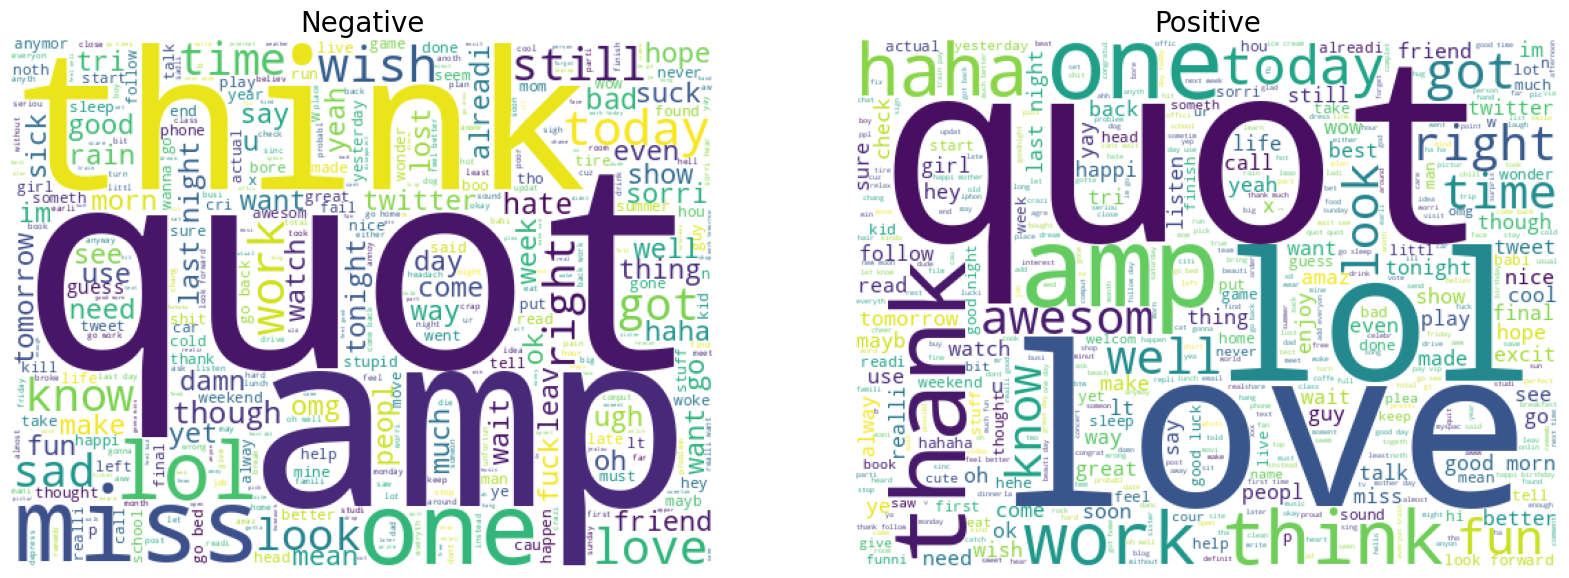

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=[20, 8])

# wordclouds
ax[0].imshow(neg_wordcloud)
ax[0].axis('off')
ax[0].set_title('Negative', fontsize=20)

ax[1].imshow(pos_wordcloud)
ax[1].axis('off')
ax[1].set_title('Positive', fontsize=20)

plt.show()

## SPLIT DATA

In [ ]:
X = df.processed_text
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1280000,) (320000,) (1280000,) (320000,)


In [ ]:
X_train.head()

1374558    ya quot like palm pre touchston charger readyn...
1389115                felt earthquak afternoon seem epicent
1137831                               ruffl shirt like likey
790714     pretti bad night crappi morn fml buttfac didnt...
1117911                                      yeah clear view
Name: processed_text, dtype: object

# Feature Extraction using Tf-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_prep = vectorizer.fit_transform(X_train)
X_test_prep = vectorizer.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_prep, y_train)

print('Train score: ', log_reg.score(X_train_prep, y_train))
print('Test score: ', log_reg.score(X_test_prep, y_test))

Train score:  0.794871875
Test score:  0.775046875


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           1       0.77      0.79      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.78      0.77    320000

Confusion matrix:


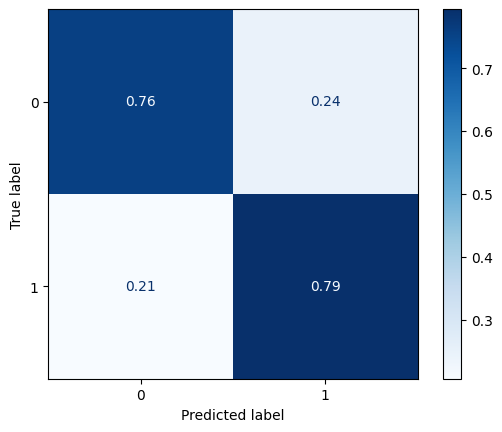

In [ ]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = log_reg.predict(X_test_prep)

print('Classification report:')
print(classification_report(y_test, y_pred))

print('Confusion matrix:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true');

# Feature Extraction Using Word Embeddings

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size:', vocab_size)

# Set the maximum sequence length
max_length = max([len(seq) for seq in X_train])
print('Maximum sequence length:', max_length)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
# Convert text to sequences and pad sequences
X_train_sequences = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test_sequences = pad_sequences(X_test, padding='post', maxlen=max_length)

# Print tokenized sequences
print('X_train_sequences:', X_train_sequences.shape)
print('X_test_sequences:', X_test_sequences.shape)

X_train_sequences: (1280000, 50)
X_test_sequences: (320000, 50)


In [ ]:
print(X_train[10])
print(X_train_sequences[10])

[56, 354, 3, 2197, 154, 56, 25, 553, 12973, 12003, 13, 81, 103, 7, 56, 354, 3, 25, 204, 612]
[   56   354     3  2197   154    56    25   553 12973 12003    13    81
   103     7    56   354     3    25   204   612     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]


# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input

# Defining the neural network model with input shape in Flatten layer
model = Sequential([
    Input(shape=(max_length, )),
    Embedding(input_dim=vocab_size, output_dim=max_length),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            12409500  
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                80032     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12489565 (47.64 MB)
Trainable params: 12489565 (47.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# checkpoint and early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = '/kaggle/working/model.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,)
callbacks = [checkpoint, early_stopping]

In [ ]:
# Training the model
model.fit(X_train_sequences, y_train, validation_split=0.1, epochs=4, batch_size=164, verbose=1, callbacks=callbacks)



Epoch 1/2
7025/7025 [==============================] - 2541s 362ms/step - loss: 0.4758 - accuracy: 0.7721 - val_loss: 0.4680 - val_accuracy: 0.7772
Epoch 2/2
7025/7025 [==============================] - 2466s 351ms/step - loss: 0.4311 - accuracy: 0.7983 - val_loss: 0.4713 - val_accuracy: 0.7767


In [ ]:
# Predictions on the test set
y_pred_prob = model.predict(X_test_sequences)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

10000/10000 [==============================] - 27s 3ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.5049
Recall: 0.6628
F1-Score: 0.5732


ROC AUC: 0.50


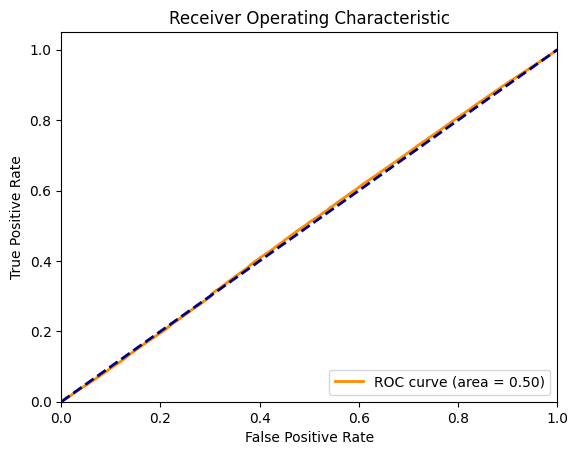

In [ ]:
# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.2f}")

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

# Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

model_reg = Sequential([
    Input(shape=(max_length, )),
    Embedding(input_dim=vocab_size, output_dim=max_length),
    Flatten(),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_reg.summary()

In [ ]:
# Train the model
model_reg.fit(X_train_sequences, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=1, callbacks=callbacks)

In [ ]:
plt.plot(model_reg.history.history['accuracy'])
plt.plot(model_reg.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluating the model
loss, accuracy = model_reg.evaluate(X_test_sequences, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
# Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = model_reg.predict(X_test_sequences)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')